# Amazon Customer Feedback Classification

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

## Prepare data

In [3]:
df = pd.read_csv('amazon_cells_labelled.txt',sep='\t')
df.columns = ['message','sentiment']

In [4]:
df['allcaps'] = df.message.str.isupper()

In [5]:
keywords = ['don\'t','not','doesn\'t','waste','worst','bad','never','broke','disappointed','but']

for key in keywords:
    df[str(key)] = df.message.str.contains(
    ' '+str(key)+' ',
        case=False
    )

In [6]:
df['positive_sentiment'] = (df['sentiment'] == 1)

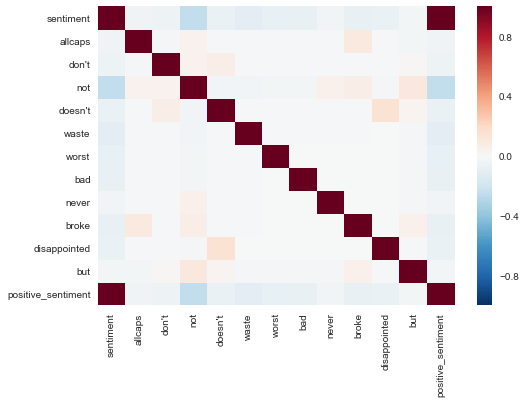

In [7]:
sns.heatmap(df.corr())

## Model Data

In [8]:
data = df[keywords +['allcaps']]
target = df['positive_sentiment']

In [9]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

y_pred = bnb.fit(data, target).predict(data)

print("Number of mislabeled points out of a total {} points: {}".format(
data.shape[0],
(target != y_pred).sum()
))

print("Model was correct {} percent of the time.".format(
    ((target == y_pred).sum())/data.shape[0]))

Number of mislabeled points out of a total 999 points: 385
Model was correct 0.6146146146146146 percent of the time.
